In [1]:
import fxcmpy
api = fxcmpy.fxcmpy(access_token='83eaf60d3c3c50e51a518aa92eb9a2047b093ace', log_level='error')

In [2]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt

In [3]:
from fxcmpy import fxcmpy_tick_data_reader as tdr


In [4]:
print(tdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [5]:
start = dt.datetime(2018,6,25)
stop = dt.datetime(2018,6,30)

In [6]:
td = tdr('EURUSD', start, stop)
td.get_raw_data().info()

<class 'pandas.core.frame.DataFrame'>
Index: 1963779 entries, 06/24/2018 21:00:12.290 to 06/29/2018 20:59:00.607
Data columns (total 2 columns):
Bid    float64
Ask    float64
dtypes: float64(2)
memory usage: 44.9+ MB


In [7]:
subset = td.get_data(start='2018-06-29 12:00:00', end='2018-06-29 12:15:00')

In [9]:
subset.head()

,Bid,Ask
2018-06-29 12:00:00.011,1.16497,1.16498
2018-06-29 12:00:00.071,1.16497,1.16497
2018-06-29 12:00:00.079,1.16497,1.16498
2018-06-29 12:00:00.091,1.16495,1.16498
2018-06-29 12:00:00.205,1.16496,1.16498


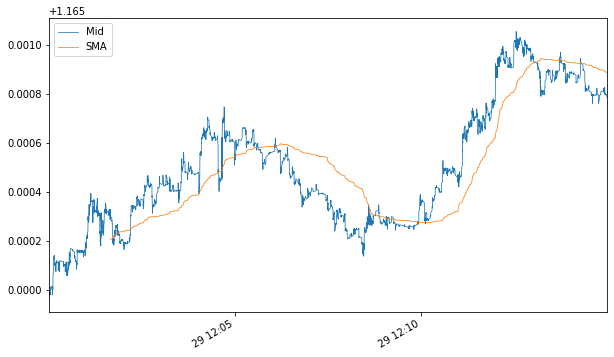

In [12]:
# Derives SMA values over intervals of 1000 ticks 
subset['Mid'] = subset.mean(axis=1)
subset['SMA'] = subset['Mid'].rolling(1000).mean()
subset[['Mid', 'SMA']].plot(figsize=(10,6), lw=0.75)

In [14]:
# Retrieving streaming data
def output(data, dataframe):
    print('%3d | %s | %s | %6.5f, %6.5f'
          % (len(dataframe), data['Symbol'], 
             pd.to_datetime(int(data['Updated']), unit='ms'),
            data['Rates'][0], data['Rates'][1]))

In [15]:
api.subscribe_market_data('EUR/USD', (output,))

  2 | EUR/USD | 2019-10-28 20:29:06.071000 | 1.10995, 1.11001
  3 | EUR/USD | 2019-10-28 20:29:07.978000 | 1.10994, 1.10999
  4 | EUR/USD | 2019-10-28 20:29:08.412000 | 1.10994, 1.11000
  5 | EUR/USD | 2019-10-28 20:29:08.912000 | 1.10994, 1.10999
  6 | EUR/USD | 2019-10-28 20:29:14.533000 | 1.10995, 1.11001


In [16]:
api.get_last_price('EUR/USD')

Bid     1.10995
Ask     1.11001
High    1.11069
Low     1.10758
Name: 2019-10-28 20:29:14.533000, dtype: float64

  7 | EUR/USD | 2019-10-28 20:29:30.239000 | 1.10995, 1.11000


In [17]:
api.unsubscribe_market_data('EUR/USD')

In [18]:
order = api.create_market_buy_order('EUR/USD', 10)
sel = ['tradeId', 'amountK', 'currency', 'grossPL', 'isBuy']

In [20]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,71915861,10,EUR/USD,-0.7,True


In [21]:
order = api.create_market_buy_order('EUR/GBP', 5)
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,71915861,10,EUR/USD,-0.80000,True
1,71915867,5,EUR/GBP,-0.70727,True


In [22]:
order = api.create_market_sell_order('EUR/USD', 3)

In [23]:
api.close_all_for_symbol('EUR/GBP')

In [27]:
api.get_open_positions_summary()

,accountId,accountName,amountK,close,com,currency,currencyPoint,grossPL,isBuy,isDisabled,...,ratePrecision,roll,stop,stopMove,t,time,tradeId,usedMargin,valueDate,visiblePL
0,,,13,0,0,EUR/USD,0,-0.81,False,False,...,0,0,0,0,1,None,,0,,-1.3


In [29]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,71915861,10,EUR/USD,-0.60,True
1,71915874,3,EUR/USD,-0.21,False


In [30]:
api.close_all()